# AMPERE

Testing for AMPERE plotting and fitting for deriving new indicies.

In [2]:
import os, sys
import pandas as pd
import numpy as np

#add read_io module to current path
file_path = 'D:\\GitHub\\DataIO\\'
sys.path.append(os.path.dirname(file_path))

In [3]:
import data_io as dio

In [4]:
amp_dat = dio.load_ampere()

Temporarily extracting ampere.20120623.k060_m08.north.grd.nc from E:\OneDrive\data\AMPERE\2012\ampere.201206.k060_m08.north.grd-007.zip to current dir


In [5]:
# code for the polar histogram plot

import itertools
import matplotlib.pyplot as plt
import matplotlib.colors as cols
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import numpy as np

# left - pow_t - theta or MLT
# height - pow_h - height of the histogram or box
# width - pow_w - width in radians (converting mlt to rads)
# bottom - pow_r - lshell - the start of the box
# z - pow_hist - color

def colored_bar(left, height, z=None, width=0.8, bottom=0, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    width = itertools.cycle(np.atleast_1d(width))
    bottom = itertools.cycle(np.atleast_1d(bottom))
    rects = []
    for x, y, h, w in zip(left, bottom, height, width):
        rects.append(Rectangle((x,y), w, h))
    coll = PatchCollection(rects, array=z, **kwargs)
    ax.add_collection(coll)
    
    #earth = [Rectangle((2*np.pi-0.5*np.pi,0), np.pi, 1),
    #         Rectangle((0.5*np.pi,0), np.pi, 1)]    
    #ec = PatchCollection(earth, facecolor=['black','white'],edgecolor=['black','black'])
    #ax.add_collection(ec)
    
    ax.bar(-0.5*np.pi,1,np.pi,align='edge',facecolor='black')
    ax.bar(0.5*np.pi,1,np.pi,align='edge',facecolor='white',edgecolor='black')

    ax.set_xlim([0,2*np.pi])
    ax.set_ylim([0,50])
    
    cbar = fig.colorbar(coll,pad=0.1, ax = ax)
    cbar.set_label('FAC Strength')
    ax.xaxis.set_ticks(np.radians(np.arange(0,360,90)))
    ax.set_xticklabels(np.degrees(ax.get_xticks())*24./360.)
    #ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    #plt.xticks(np.radians(np.arange(0,360,45)),
    #       np.arange(0,24,3))

    return coll

In [6]:
# min is 0.2
tt = 600
print(amp_dat['time'][tt])
theta = np.deg2rad(amp_dat['mlt_hr'][tt,:].flatten()*360/24.)
bottom = amp_dat['cLat_deg'][tt,:].flatten()
height = theta.copy()
width = theta.copy()
height[:] = 1
width[:] = np.deg2rad(360/24.)
z = amp_dat['jPar'][tt,:].flatten()

z[np.where(np.abs(z) < 0.2)] = 0

2012-06-23 20:00:00


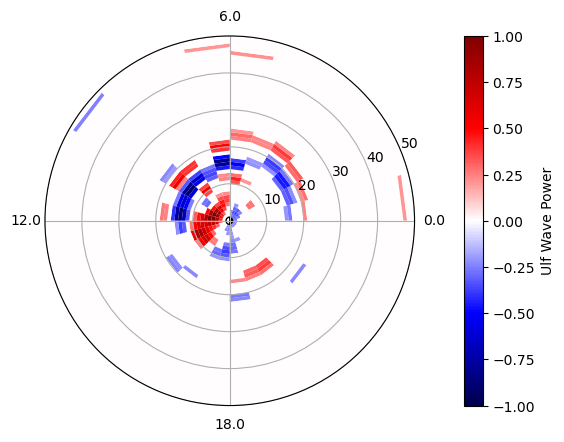

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
cmap = plt.get_cmap('seismic')

coll = colored_bar(theta,height,width=width, bottom=bottom, z=z,
                   ax=ax, cmap=cmap, norm=cols.Normalize(vmin=-1,vmax=1))

plt.show()

In [9]:
theta = np.deg2rad(amp_dat['mlt_hr'].flatten()*360/24.)

In [11]:
height =  width = theta.copy()

In [13]:
width

masked_array(data=[0.0, 0.0, 0.0, ..., 6.021385669708252,
                   6.021385669708252, 6.021385669708252],
             mask=[False, False, False, ..., False, False, False],
       fill_value=1e+20,
            dtype=float32)